<br>
# ** 5-2 Finance Analysis - Rolling**
파이썬을 활용한 금융분석

<br><br>
## **1 이동평균선을 활용한 매매 분석**
Golden Cross / Death Cross

<br>
### **01 데이터 불러오기**
read csv

In [3]:
# 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
import pandas as pd
import numpy as np
prices = pd.read_csv('./data/stock.csv', encoding='ms949')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2013-01-02 to 2018-06-05
Data columns (total 4 columns):
GM           1406 non-null float64
KO           1406 non-null float64
005930.KS    1406 non-null float64
000660.KS    1406 non-null float64
dtypes: float64(4)
memory usage: 54.9 KB


<br>
### **02 Series.rolling( ).mean()**
이동평균 데이터 생성하기 [정리 Blog](http://ordo.tistory.com/67)

In [ ]:
import numpy as np
import pandas as pd
data = [ i  for i in range(1, 3000, 2)]
data = pd.Series(data)
data[:10]

<br>
### **03 주가데이터를 활용하기**
pd.Series.rolling()

In [4]:
prices.tail(3)

,GM,KO,005930.KS,000660.KS
Date,,,,
2018-06-01,43.200001,43.119999,51300.0,91400.0
2018-06-04,43.779999,43.490002,51100.0,89800.0
2018-06-05,43.410000,43.110001,51300.0,91000.0


In [5]:
import pandas as pd
price_df = prices['000660.KS']
price_df = pd.DataFrame(price_df)
price_df.columns = ['Close']
price_df.head(3)

,Close
Date,
2013-01-02,26600.0
2013-01-03,26650.0
2013-01-04,26350.0


In [9]:
import numpy as np
price_df['15d'] = np.round(price_df['Close'].rolling(window=15).mean(),2)
price_df['40d'] = np.round(price_df['Close'].rolling(window=40).mean(),2)
price_df['15d-40d'] = price_df['15d'] - price_df['40d']
price_df.tail(3)

,Close,15d,40d,15d-40d
Date,,,,
2018-06-01,91400.0,90933.33,86510.0,4423.33
2018-06-04,89800.0,91226.67,86740.0,4486.67
2018-06-05,91000.0,91653.33,87005.0,4648.33


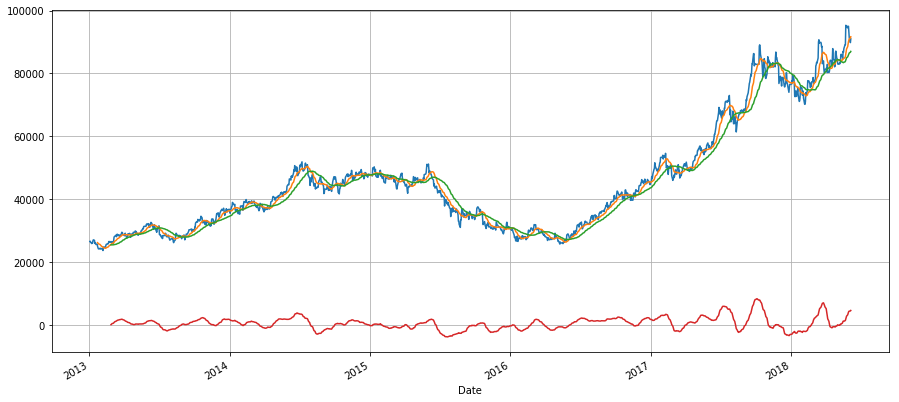

In [10]:
%matplotlib inline
price_df['Close'].plot(grid = True, figsize = (15, 7))
price_df['15d'].plot(grid = True)
price_df['40d'].plot(grid = True)
price_df['15d-40d'].plot(grid = True)

<br>
### **04 매매 시점 데이터 생성하기**
np.where()

In [27]:
X = 10     
price_df['Stance'] = np.where(price_df['15d-40d']>X,  1, 0)
price_df['Stance'] = np.where(price_df['15d-40d']<X, -1, price_df['Stance'])
price_df['Stance'].value_counts()                             

 1    824
-1    528
 0     39
Name: Stance, dtype: int64

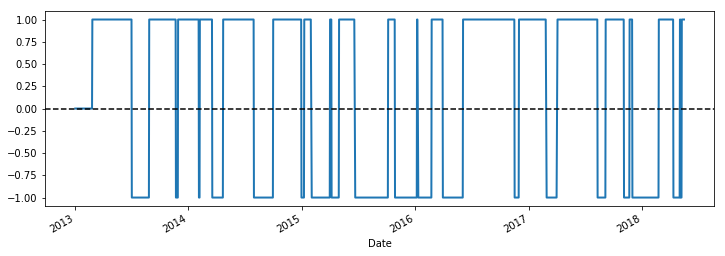

In [28]:
price_df['Stance'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

<br>
### **05 SMAC_Strategy (이동평균선 전략)으로 인한 수익률  데이터 생성**
주가를 로그 수익률로 변환한다 : 복리공식에 비해 계산의 용이성

### **np.shift()**

### **np.log()**

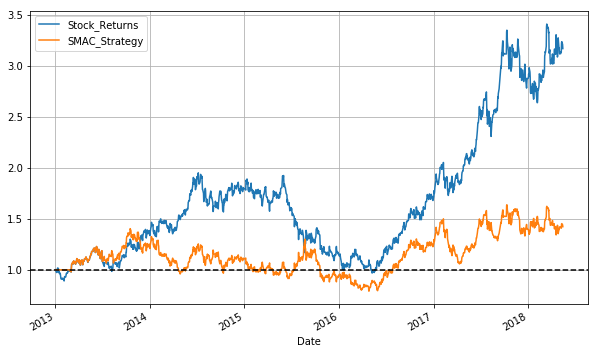

In [29]:
price_df['Stock_Returns'] = np.log(price_df['Close'] / price_df['Close'].shift(1))
price_df['SMAC_Strategy'] = price_df['Stock_Returns'] * price_df['Stance'].shift(1)
price_df[['Stock_Returns','SMAC_Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

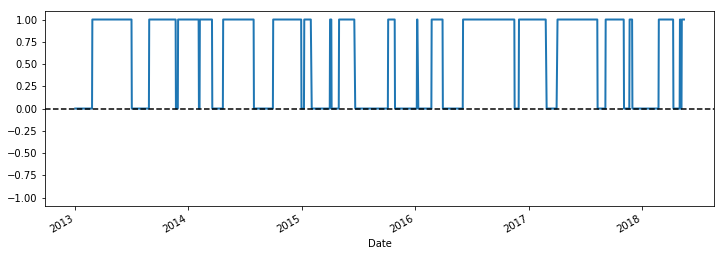

In [30]:
price_df['Stance2'] = np.where(price_df['15d-40d']>X,  1, 0)
price_df['Stance2'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

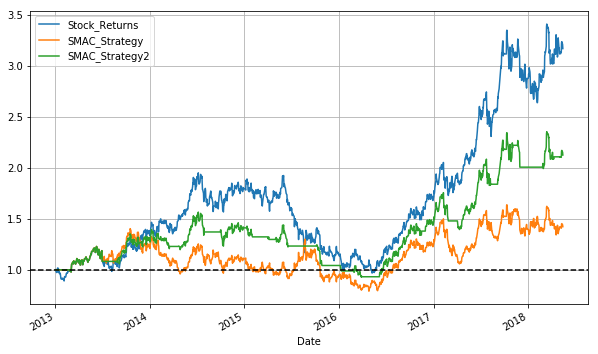

In [31]:
price_df['Stock_Returns']  = np.log(price_df['Close']  / price_df['Close'].shift(1))    
price_df['SMAC_Strategy2'] = price_df['Stock_Returns'] * price_df['Stance2'].shift(1)   
price_df[['Stock_Returns','SMAC_Strategy','SMAC_Strategy2']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
### **06 기간별 수익률 계산하기**
로그 수익률 계산하기

<br>
## ** 5 몬테카를로 시뮬레이션**

<br>
### **01 난수를 활용한 최적의 결과값 측정**

In [32]:
import numpy as np
Trials    = 10000
student   = 30
SameBirth = 0

for trial in range(Trials):
    year = [0] * 365           
    
    for i in range(student):
        new_Day        = np.random.randint(365)  
        year[new_Day] += 1     
        have_SameBday  = False 
        
    for num in year:
        if num > 1:            
            have_SameBday = True

    if have_SameBday == True:
        SameBirth += 1
    prob = float(SameBirth) / float(Trials)
        
    if trial % 999 == 0:
        print("{:4}\'th test {} 명중 2명의 생일이 같을확률 : {}".format(trial, student, prob))

   0'th test 30 명중 2명의 생일이 같을확률 : 0.0001
 999'th test 30 명중 2명의 생일이 같을확률 : 0.0728
1998'th test 30 명중 2명의 생일이 같을확률 : 0.1434
2997'th test 30 명중 2명의 생일이 같을확률 : 0.2153
3996'th test 30 명중 2명의 생일이 같을확률 : 0.2865
4995'th test 30 명중 2명의 생일이 같을확률 : 0.3567
5994'th test 30 명중 2명의 생일이 같을확률 : 0.4291
6993'th test 30 명중 2명의 생일이 같을확률 : 0.4996
7992'th test 30 명중 2명의 생일이 같을확률 : 0.57
8991'th test 30 명중 2명의 생일이 같을확률 : 0.6415
9990'th test 30 명중 2명의 생일이 같을확률 : 0.7147


<br>
### **02 금융상품들의 포트폴리오 평가**

In [33]:
prices.sort_index(inplace=True)
prices.tail(3)

,000660.KS,005930.KS,GM,KO
Date,,,,
2018-05-11,86100.0,51300.0,36.889999,42.139999
2018-05-14,85400.0,50100.0,36.630001,42.040001
2018-05-15,84300.0,49400.0,36.630001,42.040001


In [34]:
portfolio_rate     = [0.5, 0.2, 0.2, 0.1]
returns            = prices.pct_change()
cov_returns        = returns.cov()
mean_daily_returns = returns.mean()
weights            = np.asarray(portfolio_rate)

portfolio_return   = round(np.sum(
    mean_daily_returns * weights) * 252, 2)   

portfolio_std_dev  = round(np.sqrt(
    np.dot(weights.T, 
           np.dot(cov_returns, weights)) ) * np.sqrt(252), 2) 

print('{} 분산비율의 포트폴리오의 \n1) 연간 수익은 +-{} 이고 \n2) 변동률은     {} 이다'.format(
    portfolio_rate, portfolio_return, portfolio_std_dev))

[0.5, 0.2, 0.2, 0.1] 분산비율의 포트폴리오의 
1) 연간 수익은 +-0.17 이고 
2) 변동률은     0.2 이다


<br>
### **03 몬테카를로 시뮬레이션을 활용한  포트폴리오 평가**

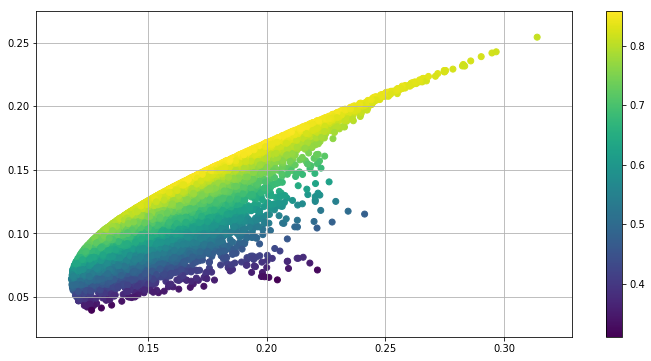

In [35]:
returns            = prices.pct_change()
cov_returns        = returns.cov()      
mean_daily_returns = returns.mean()

num_portfolios     = 25000                  
results            = np.zeros((3 + len(codes), num_portfolios))
for i in range(num_portfolios):
    weights  = np.random.random(len(codes))
    weights /= np.sum(weights)             
    
    portfolio_return  = np.sum(
        mean_daily_returns * weights) * 252       

    portfolio_std_dev = np.sqrt(              
        np.dot(weights.T, np.dot(cov_returns, weights))) * np.sqrt(252)   

    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i]/results[1,i]

    for j in range(len(weights)):           
        results[j+3, i] = weights[j]           
    
results_frame = pd.DataFrame(results.T, 
                             columns = ['ret','stdev','sharpe', 
                                        codes[0], codes[1], codes[2], codes[3]])
plt.figure(figsize=(12,6))
plt.scatter(results_frame.stdev, 
            results_frame.ret,  
            c = results_frame.sharpe)
plt.grid(); plt.colorbar()

<br>
### **04 몬테카를로 포트폴리오 최적값 계산**
1. 샤프지수 최대인 포트폴리오
1. 표준편차 최소인 포트폴리오 

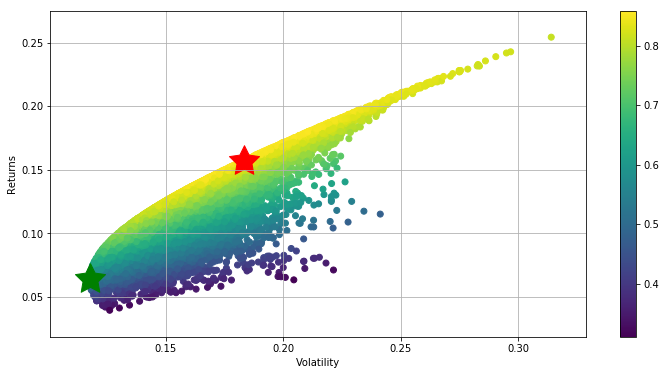

In [36]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port    = results_frame.iloc[results_frame['stdev'].idxmin()] 
 
plt.figure(figsize=(12,6)); plt.grid()
plt.scatter(results_frame.stdev, 
            results_frame.ret,
            c = results_frame.sharpe)
plt.xlabel('Volatility'); plt.ylabel('Returns'); plt.colorbar()

plt.scatter(max_sharpe_port[1], max_sharpe_port[0],
            marker = (5,1,0), color = 'r', s = 1000)

plt.scatter(min_vol_port[1],  min_vol_port[0],
            marker = (5,1,0), color = 'g', s = 1000)

In [37]:
print(max_sharpe_port)

ret          0.157330
stdev        0.183201
sharpe       0.858781
GM           0.462136
KO           0.170104
005930.KS    0.146521
000660.KS    0.221240
Name: 16573, dtype: float64


In [38]:
print(min_vol_port)

ret          0.064267
stdev        0.117696
sharpe       0.546043
GM           0.068051
KO           0.163415
005930.KS    0.125970
000660.KS    0.642564
Name: 11619, dtype: float64


<br>
## ** 6 다양한 금융 데이터 생성하기**
https://wikidocs.net/3396
Bollinger Bands 

In [39]:
from pandas_datareader import get_data_yahoo
price_temp = get_data_yahoo('000660.KS', '2017-01-01')

[*********************100%***********************]  1 of 1 downloaded


<br>
### **01 Stochastic Oscillator** 

In [40]:
def fnStoch(df, n=14):
    import pandas as pd
    sz = len(df['Close'])
    tempSto_K = []
    for i in range(sz):
        if i >= n-1:
            tempUp   = df['Close'][i] - min(df['Low'][i-n+1:i+1])
            tempDown = max(df['High'][i-n+1:i+1]) -  min(df['Low'][i-n+1:i+1])
            tempSto_K.append( tempUp / tempDown )
        else:
            tempSto_K.append(0) 
    df['Sto_K']     = pd.Series(tempSto_K,  index=df.index)
    df['Sto_D']     = pd.Series(df['Sto_K'].rolling(3).mean())
    df['Sto_SlowD'] = pd.Series(df['Sto_D'].rolling(3).mean())
    return df

In [41]:
price_ = fnStoch(price_temp)
price_.head(3)

,Open,High,Low,Close,Adj Close,Volume,Sto_K,Sto_D,Sto_SlowD
Date,,,,,,,,,
2017-01-02,44750.0,46000.0,44600.0,45800.0,45181.082031,1547681,0.0,NaN,NaN
2017-01-03,46200.0,47300.0,46200.0,47250.0,46611.488281,2655477,0.0,NaN,NaN
2017-01-04,47000.0,47150.0,46200.0,46500.0,45871.621094,2722599,0.0,0.0,NaN


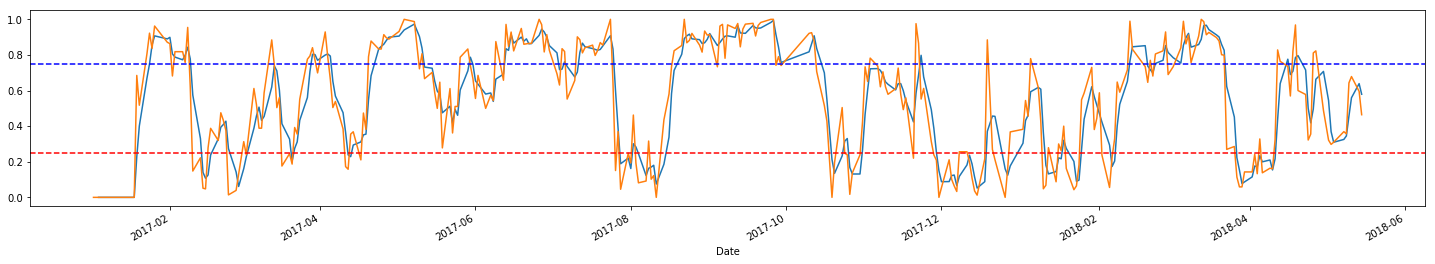

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(25,4))
price_.Sto_D.plot()
price_.Sto_K.plot()
plt.axhline(y = 0.25, linestyle = '--', color = 'red')
plt.axhline(y = 0.75, linestyle = '--', color = 'blue')

<br>
### **02 RSI(Relative Strength Index; 상대강도지수)** 

In [43]:
def fnRSI(m_Df, m_N):    
    import numpy as np
    import pandas as pd

    U = np.where(m_Df.diff(1) > 0, m_Df.diff(1), 0)
    D = np.where(m_Df.diff(1) < 0, m_Df.diff(1) *(-1), 0)

    AU = pd.DataFrame(U).rolling( window=m_N, min_periods=m_N).mean()
    AD = pd.DataFrame(D).rolling( window=m_N, min_periods=m_N).mean()
    RSI = AU.div(AD + AU) * 100
    return RSI

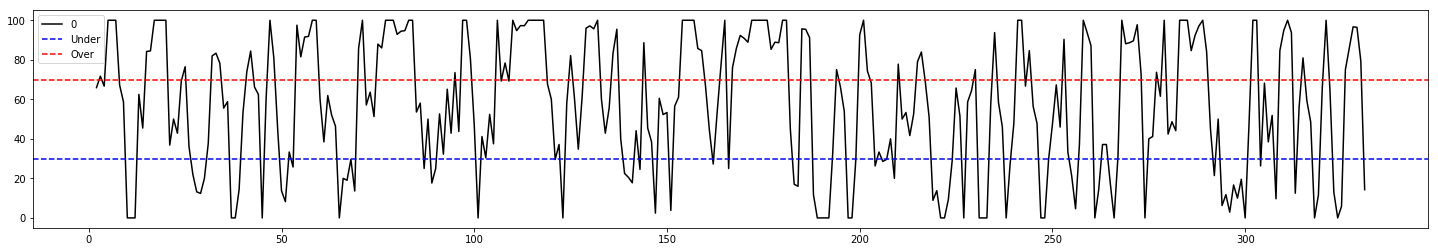

In [44]:
price_RSI = fnRSI(price_temp.Close, 3)
price_RSI.plot(figsize=(25,4), label='RSI', color='black')
plt.axhline(y = 30, linestyle = '--', color = 'blue', label = 'Under')
plt.axhline(y = 70, linestyle = '--', color = 'red',  label = 'Over') 
plt.legend()

<br>
### **03 볼린저 밴드 데이터 그리기**
Bollinger Bands 

In [45]:
def fnBolingerBand(m_DF, n=20, k=2):
    m_DF['20d_ma']    = m_DF['Close'].rolling(n).mean()
    m_DF['Bol_upper'] = m_DF['Close'].rolling(n).mean() +  k * m_DF['Close'].rolling(n, min_periods=n).std()
    m_DF['Bol_lower'] = m_DF['Close'].rolling(n).mean() -  k * m_DF['Close'].rolling(n, min_periods=n).std()
    return m_DF

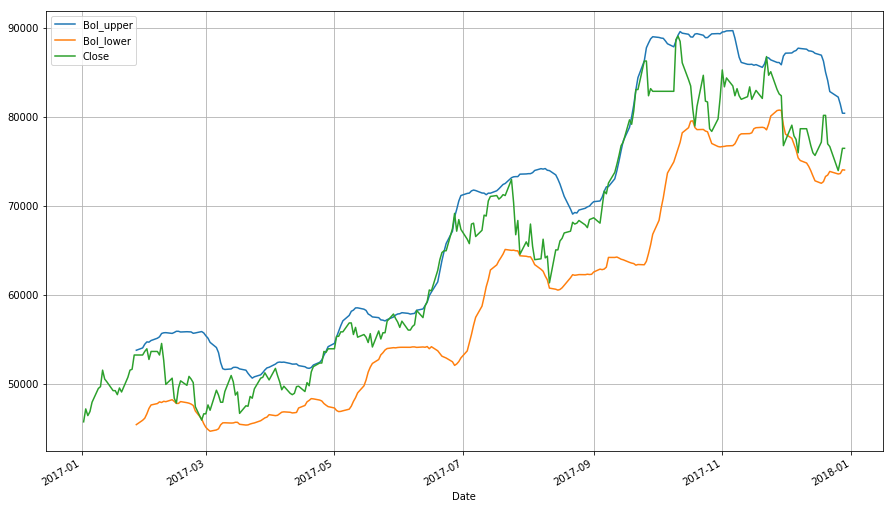

In [46]:
import warnings
warnings.filterwarnings("ignore")

price_2017    = price_df['2017']
price_df_boli = fnBolingerBand(price_2017)
plt.figure(figsize=(15,9))
price_df_boli.Bol_upper.plot()
price_df_boli.Bol_lower.plot()
price_df_boli.Close.plot()
plt.legend(); plt.grid(); plt.show()

<br>
### **04 MACD(moving average convergence/divergence)** 

In [47]:
def fnMACD(m_Df, m_NumFast=12, m_NumSlow=26, m_NumSignal=9):
    m_Df['EMAFast']    = m_Df['Close'].rolling( window = m_NumFast, min_periods = m_NumFast - 1).mean()
    m_Df['EMASlow']    = m_Df['Close'].rolling( window = m_NumSlow, min_periods = m_NumSlow - 1).mean()
    m_Df['MACD']       = m_Df['EMAFast'] - m_Df['EMASlow']
    m_Df['MACDSignal'] = m_Df['MACD'].ewm( span = m_NumSignal, min_periods = m_NumSignal-1).mean()
    m_Df['MACDDiff']   = m_Df['MACD'] - m_Df['MACDSignal']
    return m_Df

In [48]:
price_fnMACD = fnMACD(price_temp)
price_fnMACD.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Sto_K,Sto_D,Sto_SlowD,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff
Date,,,,,,,,,,,,,,
2018-05-11,86600.0,86800.0,85400.0,86100.0,86100.0,2107047,0.678571,0.559524,0.453704,84200.000000,83557.692308,642.307692,828.716680,-186.408988
2018-05-14,86100.0,86300.0,84500.0,85400.0,85400.0,1959236,0.595238,0.638889,0.551587,84475.000000,83750.000000,725.000000,807.973344,-82.973344
2018-05-15,86000.0,86000.0,84000.0,84300.0,84300.0,959308,0.464286,0.579365,0.592593,84633.333333,83803.846154,829.487179,812.276111,17.211068


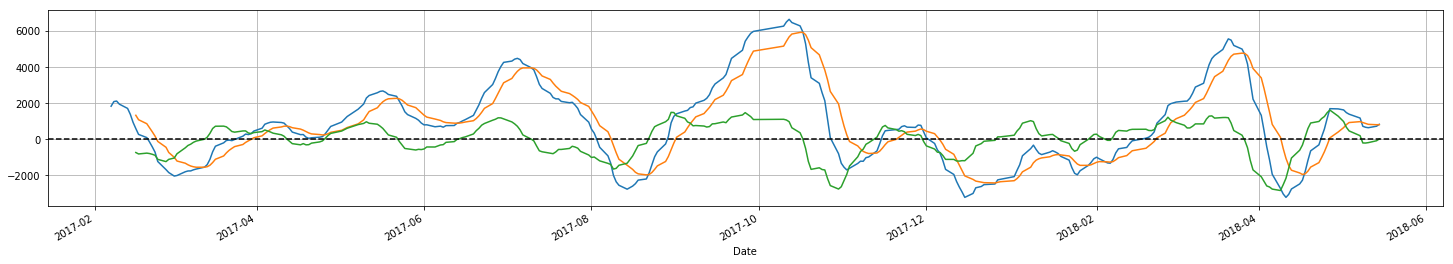

In [49]:
plt.figure(figsize=(25,4))
price_fnMACD.MACD.plot()
price_fnMACD.MACDSignal.plot()
price_fnMACD.MACDDiff.plot()
plt.axhline(y = 0, linestyle = '--', color = 'k')
plt.grid()
plt.show()